1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [2]:
# read data into a DataFrame
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
%matplotlib inline
import random
from sklearn.datasets import make_classification

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [3]:
df['default'] = df['default'].replace('No', 'default_No').replace('Yes', 'default_Yes')
df['student'] = df['student'].replace('No', 'student_No').replace('Yes', 'student_Yes')
df_default=pd.get_dummies(df['default'])
df_student=pd.get_dummies(df['student'])
df_final = pd.concat([df[['balance','income']],df_default,df_student],axis=1)
df_final.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
1,729.526495,44361.625074,1,0,1,0
2,817.180407,12106.134700,1,0,0,1
3,1073.549164,31767.138947,1,0,1,0
4,529.250605,35704.493935,1,0,1,0
5,785.655883,38463.495879,1,0,1,0


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

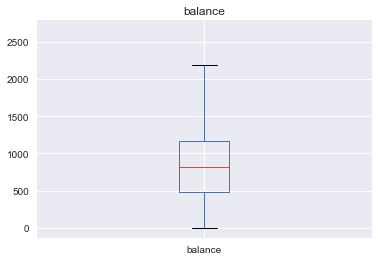

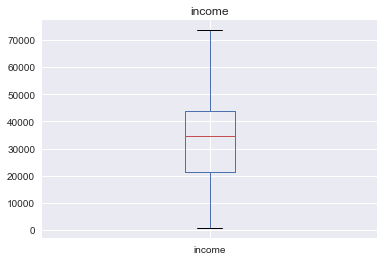

In [4]:
balance = df[['balance']]
income = df[['income']]

plt.figure()
balance.boxplot()
plt.title('balance')

plt.figure()
income.boxplot()
plt.title('income')

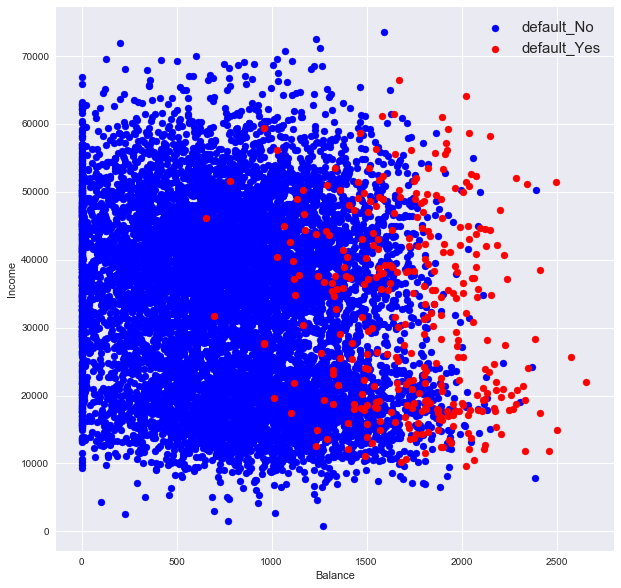

In [5]:
defaultY = df_final[df_final.default_Yes == 1]
defaultN = df_final[df_final.default_No == 1]
plt.figure(figsize=(10, 10))
plt.scatter(defaultN['balance'],defaultN['income'],c='b',label='default_No')
plt.scatter(defaultY['balance'],defaultY['income'],c='r',label='default_Yes')
plt.ylabel('Income')
plt.xlabel('Balance')
plt.legend(prop={'size':15})

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

<a list of 6 text.Text objects>

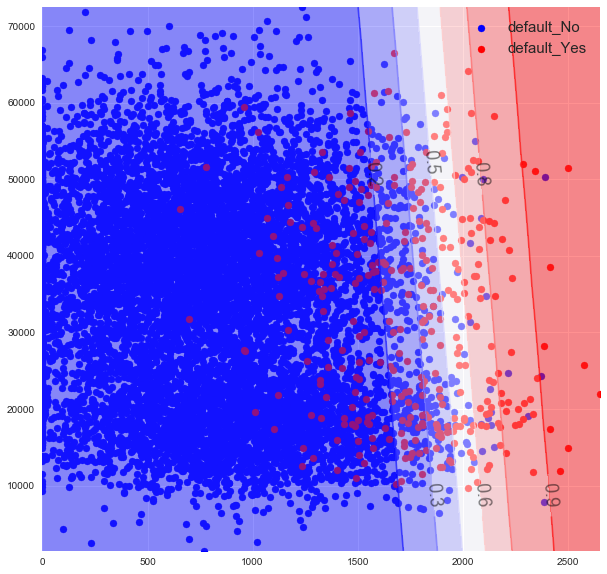

In [6]:
X = df_final[['balance', 'income']]
y = df_final.default_Yes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(penalty='l1')
clf.fit(X_train,y_train)

plt.figure(figsize=(10, 10))
x_min, x_max = X_train['balance'].min() - .5, X_train['balance'].max() + .5
y_min, y_max = X_train['income'].min() - .5, X_train['income'].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
ax.scatter(defaultN['balance'],defaultN['income'],c='b',label = 'default_No')
ax.scatter(defaultY['balance'],defaultY['income'],c='r',label='default_Yes')
ax.legend(prop={'size':15})
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='bwr', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='bwr', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=18)


# make legend
#plt.legend([defaultY, defaultN],['Y','N'])
#ax.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'ro', label='Class 1')
#ax.plot(X_train[ytrain == 1, 0], X_train[y_train == 1, 1], 'bo', label='Class 2')

Area under the ROC curve : 0.949481


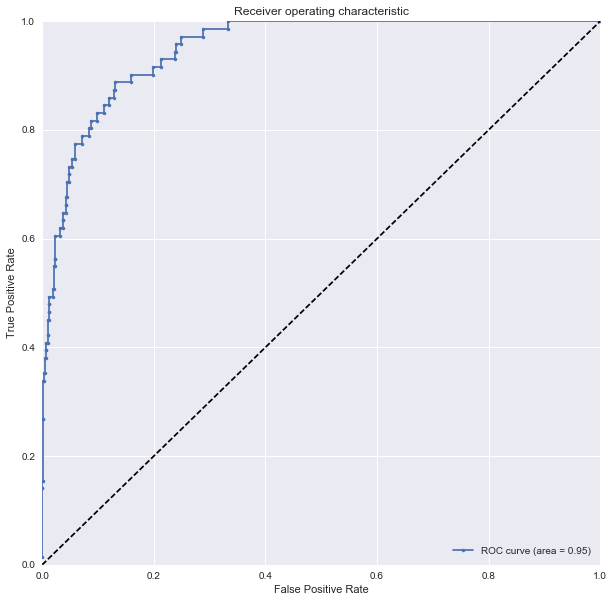

In [7]:
def generate_auc(X_train,y_train,clf_class,**kwargs):
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X_train,y_train,LogisticRegression,C=0.1,penalty='l1')

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.figure(figsize=(10,10))
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

- With student variable AUCROC = 0.942191
- Without student variable AUCROC = 0.943680
- The performance barely improved

Area under the ROC curve : 0.942577
Area under the ROC curve : 0.942607
Area under the ROC curve : 0.942592
Area under the ROC curve : 0.942727
Area under the ROC curve : 0.942900
Area under the ROC curve : 0.943005
Area under the ROC curve : 0.943072
Area under the ROC curve : 0.943132
Area under the ROC curve : 0.943185
Area under the ROC curve : 0.943245
Area under the ROC curve : 0.943237
Area under the ROC curve : 0.943297
Area under the ROC curve : 0.943305
Area under the ROC curve : 0.943380
Area under the ROC curve : 0.943425
Area under the ROC curve : 0.943425
Area under the ROC curve : 0.943462
Area under the ROC curve : 0.943508
Area under the ROC curve : 0.943538
Area under the ROC curve : 0.943538
Area under the ROC curve : 0.943590
Area under the ROC curve : 0.943628
Area under the ROC curve : 0.943515
Area under the ROC curve : 0.943523
Area under the ROC curve : 0.943500
Area under the ROC curve : 0.943523
Area under the ROC curve : 0.943590
Area under the ROC curve : 0

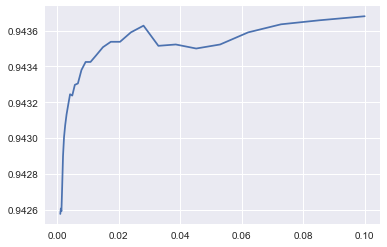

In [8]:
X = df_final[['balance', 'income','student_Yes']]
y = df_final.default_Yes

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-3,-1,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l2')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
plt.plot(alphas,scores)


Optimal regularization parameter : 0.17433288222


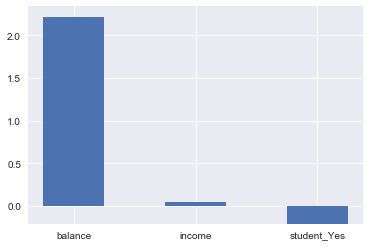

In [9]:
alphas = np.logspace(-3,10,30)
enet = LogisticRegression() #C=alpha_best,penalty='l1')
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet = LogisticRegression(C=alpha,penalty='l2') 
    #enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
   
    probas_ = enet.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    train_errors.append(roc_auc)
    
    probas_ = enet.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    test_errors.append(roc_auc)

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
#enet.set_params(alpha=alpha_optim)
#coef_ = enet.fit(X, y).coef_
coef =  LogisticRegression(C=alpha_optim,penalty='l2').fit(X,y).coef_

ind = np.arange(3)  
width = 0.50

balance = coef[np.array([0]),np.array([0])]
income = coef[np.array([0]),np.array([1])]
student = coef[np.array([0]),np.array([2])]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar([0,1,2],[balance,income,student],width)
ax.set_xticks([0,1,2])
ax.set_xticklabels(('balance', 'income', 'student_Yes', 'student_No'))


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

- The cross_val score is almost one, so our model should be considered robust

In [10]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(enet, X, y, cv =5)
cvs

array([ 0.97551224,  0.97351324,  0.971     ,  0.97248624,  0.97348674])

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [11]:
from sklearn.tree import DecisionTreeClassifier
import numpy.random as nprnd
from PIL import Image, ImageFilter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from __future__ import print_function
import os
import subprocess
from IPython.display import Image

In [12]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

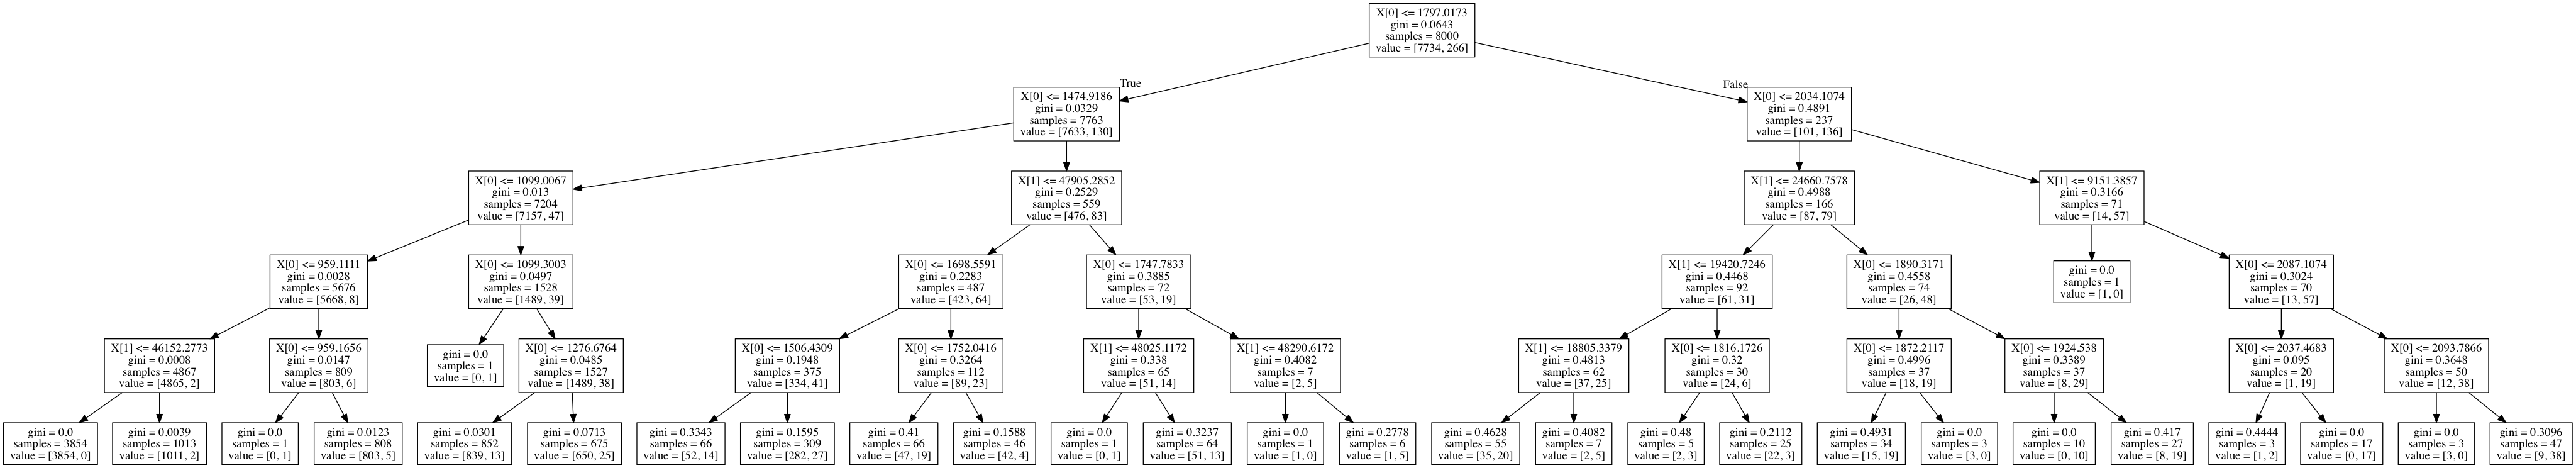

In [13]:
dt=DecisionTreeClassifier(max_depth=5)

X = df_final[['balance', 'income']]
y = df_final.default_Yes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit regression model
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Predict
y = clf.predict(X_test)

dt=DecisionTreeClassifier(max_depth=5)
visualize_tree(clf, feature_names=['x'])

dot_data=export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


Area under the ROC curve : 0.943904


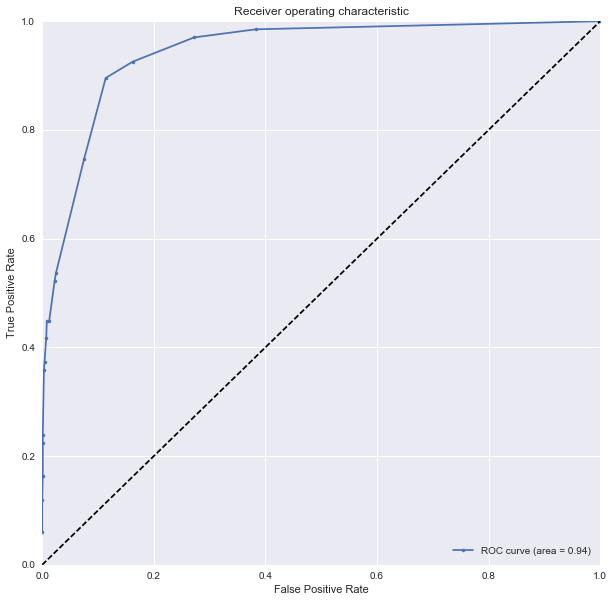

In [14]:

#plot Roc
plt.figure(figsize=(10,10))
y = df_final['default_Yes']
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth=5)
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)


8) Find the optimal decision tree depth and compute the AUC ROC. 

optimal depth is 2


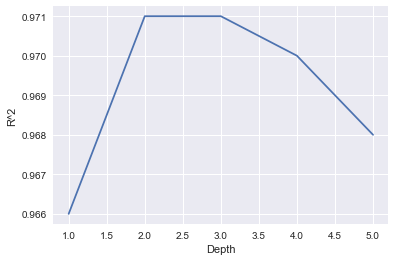

In [15]:
from sklearn.model_selection import train_test_split
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print ("optimal depth is" , n_opt)

Area under the ROC curve : 0.920262


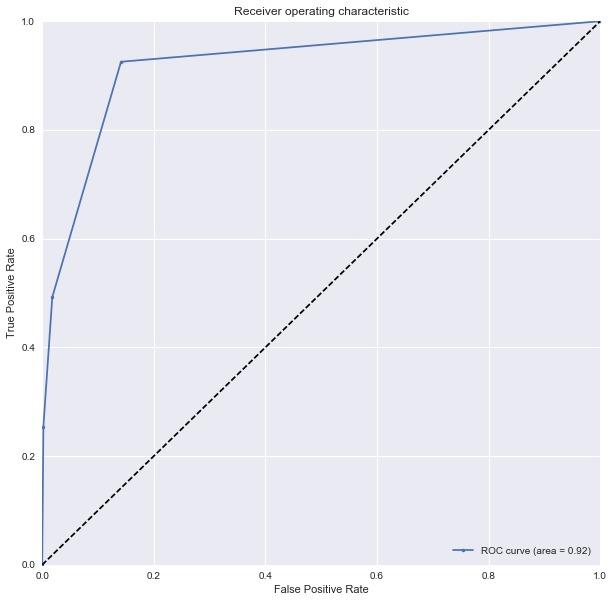

In [16]:
fpr,tpr,roc_auc, thresholds = generate_auc(X_test,y_test,DecisionTreeClassifier,max_depth=2)
     
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)